1. Import Libraries

In [20]:
import pandas as pd

file_path = 'shuntdata.xlsx'
data = pd.read_excel(file_path)


data.head()


,x1,y1,x2,y2,x3,y3,x4,y4
0,103.268765,21.069364,106.617647,0.937940,102.258469,34.65,106.724782,64.660000
1,107.627119,21.173410,109.926471,0.938166,115.809285,34.65,101.120797,64.105455
2,110.895884,21.242775,113.235294,0.938393,120.326223,34.65,112.328767,65.214545
3,109.806295,21.277457,117.647059,0.938619,136.135508,34.65,115.691158,65.547273
4,114.164649,21.416185,120.955882,0.938846,113.550816,34.65,120.174346,65.990909


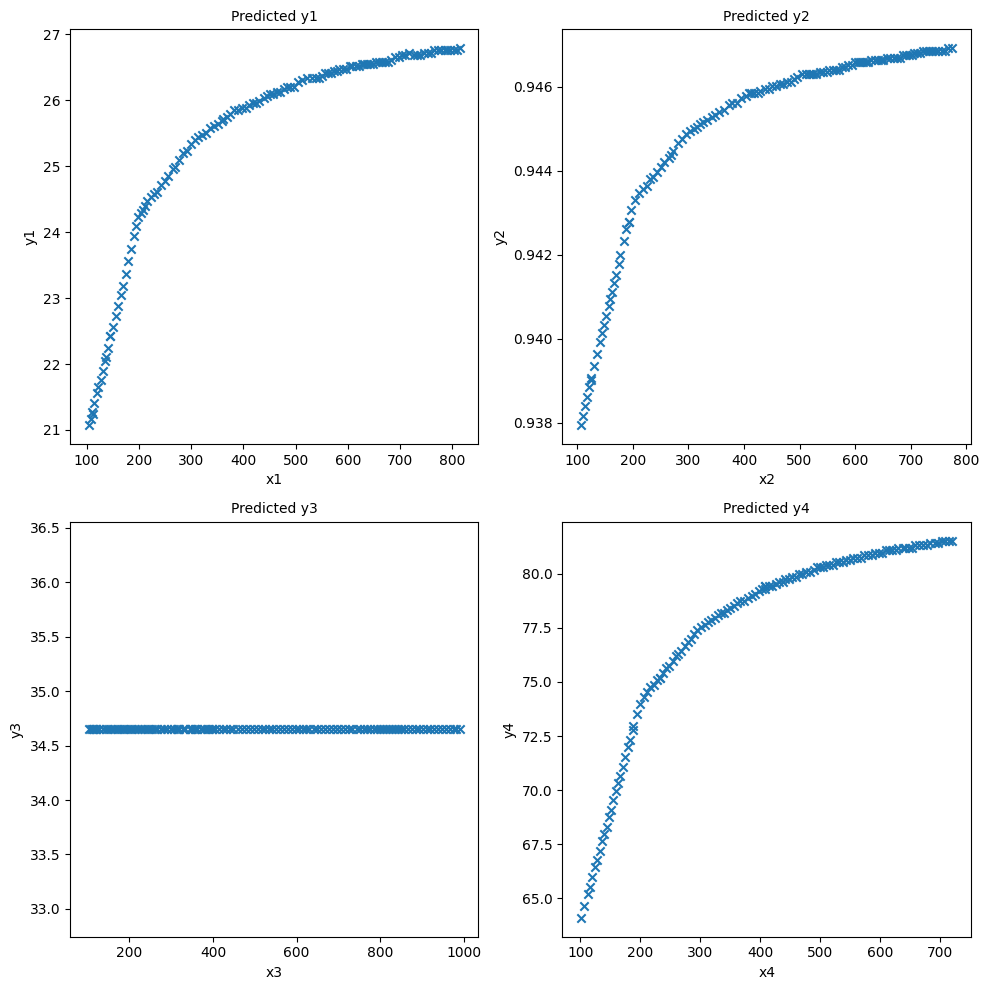

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(data['x1'], data['y1'], label='Predicted y1', marker='x')
axs[0, 0].set_title('Predicted y1', fontsize=10)
axs[0, 0].set_xlabel('x1', fontsize=10)
axs[0, 0].set_ylabel('y1', fontsize=10)

# Second plot: X2 vs Y2
axs[0, 1].scatter(data['x2'], data['y2'], label='Predicted y2', marker='x')
axs[0, 1].set_title('Predicted y2', fontsize=10)
axs[0, 1].set_xlabel('x2', fontsize=10)
axs[0, 1].set_ylabel('y2', fontsize=10)

# Third plot: X3 vs Y3
axs[1, 0].scatter(data['x3'], data['y3'], label='Predicted y3', marker='x')
axs[1, 0].set_title('Predicted y3', fontsize=10)
axs[1, 0].set_xlabel('x3', fontsize=10)
axs[1, 0].set_ylabel('y3', fontsize=10)

# Fourth plot: X4 vs Y4
axs[1, 1].scatter(data['x4'], data['y4'], label='Predicted y4', marker='x')
axs[1, 1].set_title('Predicted y4', fontsize=10)
axs[1, 1].set_xlabel('x4', fontsize=10)
axs[1, 1].set_ylabel('y4', fontsize=10)


plt.tight_layout()

# Display the plots
plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def apply_polynomial_regression(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    return model, poly

def find_best_polynomial_degree(x, y, max_degree=10):
    best_degree = 1
    best_mse = float('inf')
    best_model, best_poly = None, None
    
    for degree in range(1, max_degree + 1):
        model, poly = apply_polynomial_regression(x, y, degree)
        y_pred = model.predict(poly.transform(x))
        mse = mean_squared_error(y, y_pred)
        
        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_model, best_poly = model, poly
    
    return best_model, best_poly, best_degree, best_mse

model1, poly1, best_degree1, mse1 = find_best_polynomial_degree(data[['x1']], data['y1'])
model2, poly2, best_degree2, mse2 = find_best_polynomial_degree(data[['x2']], data['y2'])
model4, poly4, best_degree4, mse4 = find_best_polynomial_degree(data[['x4']], data['y4'])

model3 = LinearRegression()
model3.fit(data[['x3']], data['y3'])

def predict_all(x_value):
    x_input = np.array([[x_value]])  # Convert to 2D array for sklearn
    
    y1_pred = model1.predict(poly1.transform(x_input))[0]
    y2_pred = model2.predict(poly2.transform(x_input))[0]
    y4_pred = model4.predict(poly4.transform(x_input))[0]
    
    y3_pred = model3.predict(x_input)[0]
    
    return y1_pred, y2_pred, y3_pred, y4_pred


In [23]:

x_val = 110.89
y1_pred, y2_pred, y3_pred, y4_pred = predict_all(x_val)
y3_pred=34.5
print(f"For x = {x_val}:")
print(f"Predicted y1 = {y1_pred}")
print(f"Predicted y2 = {y2_pred}")
print(f"Predicted y3 = {y3_pred}")
print(f"Predicted y4 = {y4_pred}")

y1_pred_all = model1.predict(poly1.transform(data[['x1']]))
y2_pred_all = model2.predict(poly2.transform(data[['x2']]))
y3_pred_all = model3.predict(data[['x3']])
y4_pred_all = model4.predict(poly4.transform(data[['x4']]))

For x = 110.89:
Predicted y1 = 21.20593210984937
Predicted y2 = 0.9380570933017855
Predicted y3 = 34.5
Predicted y4 = 64.80671352765975


/Users/shashankgautam/Downloads/untitled folder 2/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/shashankgautam/Downloads/untitled folder 2/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/shashankgautam/Downloads/untitled folder 2/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/shashankgautam/Downloads/untitled folder 2/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:

r2_1 = r2_score(data['y1'], y1_pred_all)
r2_2 = r2_score(data['y2'], y2_pred_all)
r2_3 = r2_score(data['y3'], y3_pred_all)
r2_4 = r2_score(data['y4'], y4_pred_all)

mse_1 = mean_squared_error(data['y1'], y1_pred_all)
mse_2 = mean_squared_error(data['y2'], y2_pred_all)
mse_3 = mean_squared_error(data['y3'], y3_pred_all)
mse_4 = mean_squared_error(data['y4'], y4_pred_all)

print("R2 Vaalue")
print(f"Model 1 (Polynomial): R² = {r2_1}")
print(f"Model 2 (Polynomial): R² = {r2_2}")
print(f"Model 3 (Linear): R² = {r2_3}")
print(f"Model 4 (Polynomial): R² = {r2_4}")
print("---------------------------------------------------")
print("MSE Value")
print(f"Model 1 (Polynomial): MSE = {mse_1}")
print(f"Model 2 (Polynomial): MSE = {mse_2}")
print(f"Model 3 (Linear): MSE = {mse_3}")
print(f"Model 4 (Polynomial): MSE = {mse_4}")

R2 Vaalue
Model 1 (Polynomial): R² = 0.9981316277135907
Model 2 (Polynomial): R² = 0.9984702806040682
Model 3 (Linear): R² = 0.0
Model 4 (Polynomial): R² = 0.9984443352884272
---------------------------------------------------
MSE Value
Model 1 (Polynomial): MSE = 0.005035593081548194
Model 2 (Polynomial): MSE = 9.214430558567344e-09
Model 3 (Linear): MSE = 5.048709793414476e-29
Model 4 (Polynomial): MSE = 0.03366203687354431


In [25]:
data[['x1']].shape

(120, 1)

In [26]:
y1_pred = model1.predict(poly1.transform(data[['x1']]))
y1_pred

array([20.85151121, 21.05688667, 21.20619729, 21.15687029, 21.35155712,
       21.53937101, 21.67584017, 21.85209998, 22.02202152, 22.14541605,
       22.26542843, 22.42031591, 22.49561166, 22.71316938, 22.88524195,
       23.01709687, 23.17492901, 23.29579942, 22.49561166, 23.41204243,
       23.55106992, 23.68339336, 23.78461442, 23.88186527, 23.97528298,
       24.08686842, 24.15115133, 24.23386029, 24.31325282, 24.44457333,
       24.53273173, 24.63266561, 24.72655762, 24.82893261, 24.91092711,
       25.01257407, 25.06031212, 25.13923676, 25.21266719, 25.28102806,
       25.34472118, 25.40412607, 25.45190327, 25.50427764, 25.55333064,
       25.59295983, 25.63662354, 25.67776958, 25.71664326, 25.73266481,
       25.76364906, 25.79332791, 25.82646291, 25.85815988, 25.88857942,
       25.91786748, 25.93816838, 25.96581612, 25.98506611, 26.00767492,
       26.03707729, 26.0550695 , 26.07631154, 26.09720831, 26.11779178,
       26.13808886, 26.15812167, 26.17790781, 26.19746061, 26.21

In [27]:
y3_pred = model3.predict(data[['x3']])
y3_pred

array([34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65, 34.65,
       34.65, 34.65, 34.65])

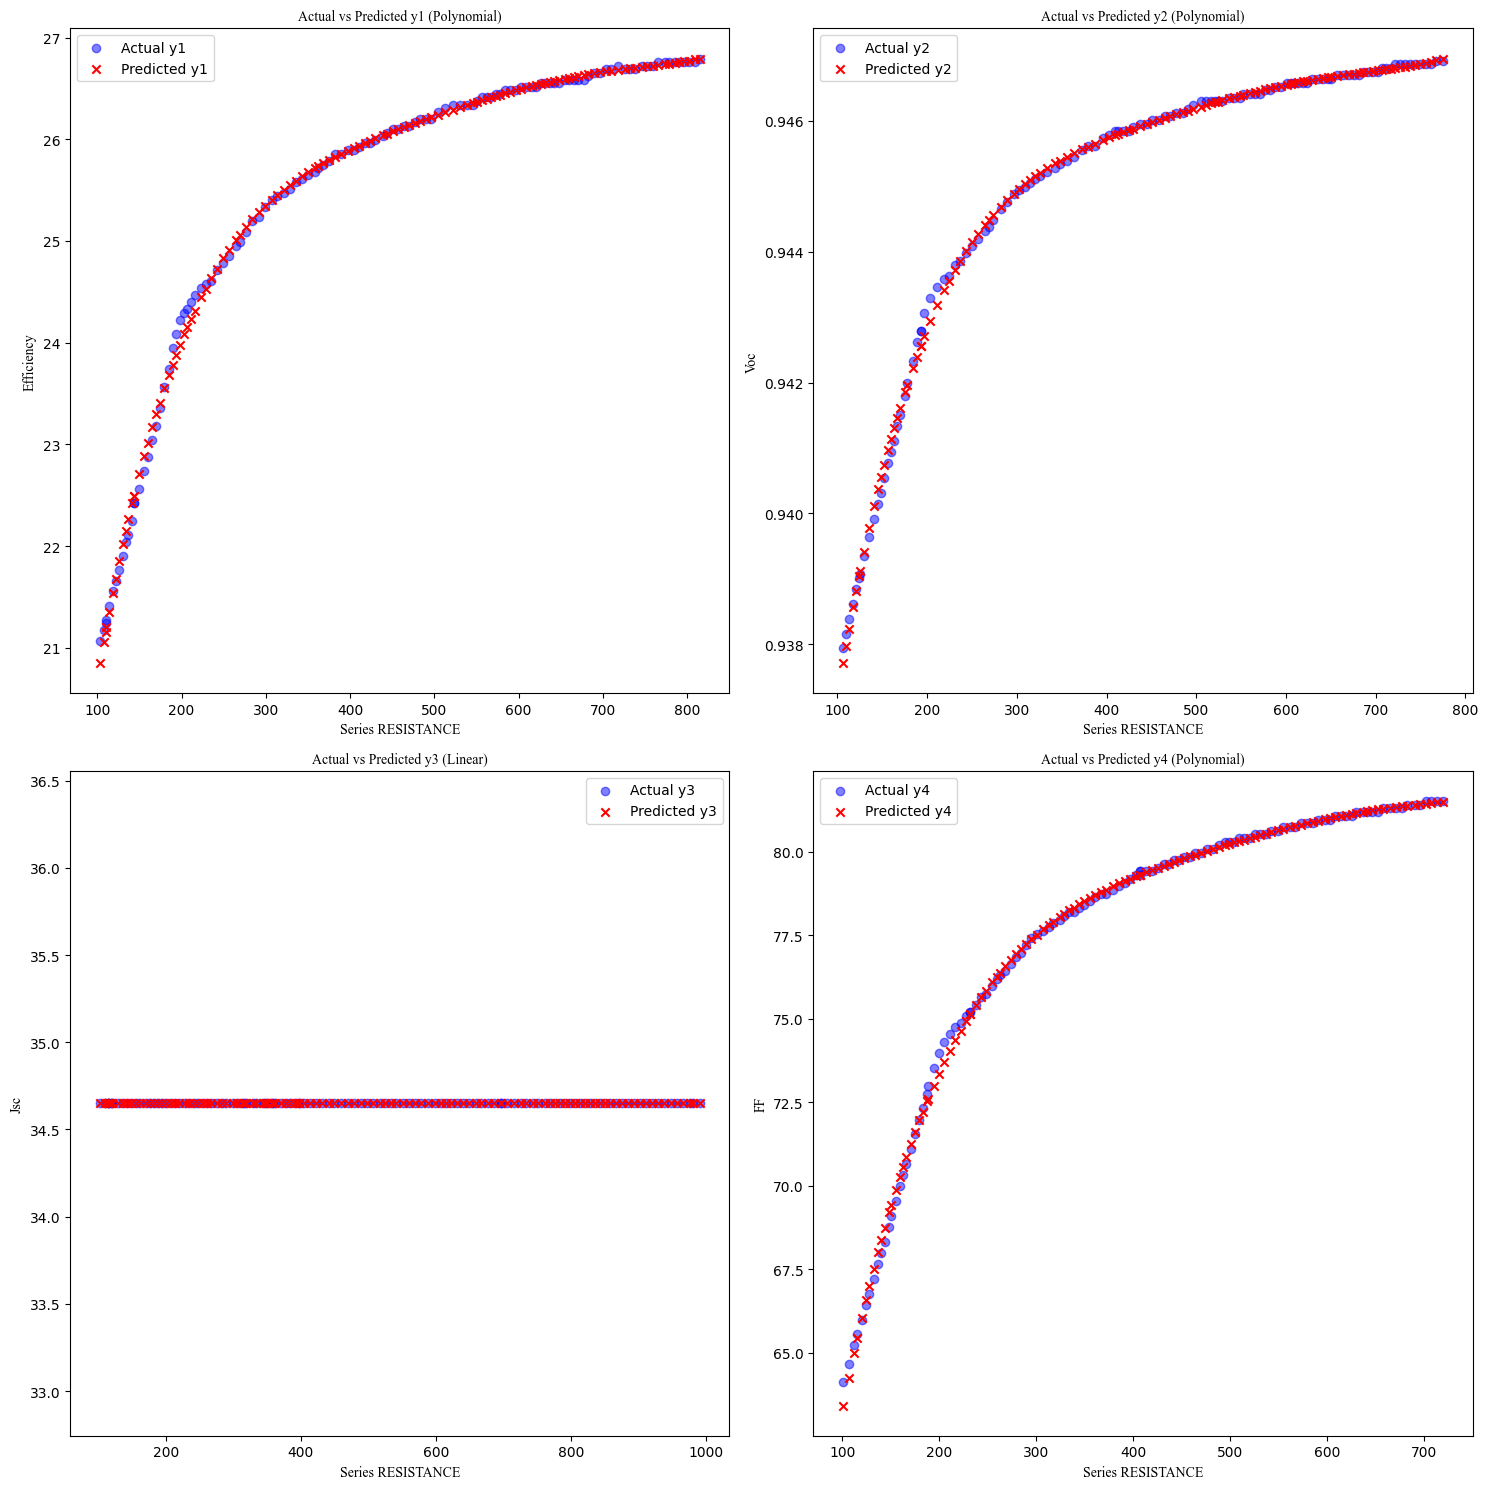

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].scatter(data['x1'], data['y1'], label='Actual y1', color='blue', alpha=0.5)
axs[0, 0].scatter(data['x1'], y1_pred_all, label='Predicted y1', color='red', marker='x')
axs[0, 0].set_title(f'Actual vs Predicted y1 (Polynomial)', fontname="Times New Roman", fontsize=10)
axs[0, 0].set_xlabel('Series RESISTANCE', fontname="Times New Roman", fontsize=10)
axs[0, 0].set_ylabel('Efficiency', fontname="Times New Roman", fontsize=10)
axs[0, 0].legend()

axs[0, 1].scatter(data['x2'], data['y2'], label='Actual y2', color='blue', alpha=0.5)
axs[0, 1].scatter(data['x2'], y2_pred_all, label='Predicted y2', color='red', marker='x')
axs[0, 1].set_title(f'Actual vs Predicted y2 (Polynomial)', fontname="Times New Roman", fontsize=10)
axs[0, 1].set_xlabel('Series RESISTANCE', fontname="Times New Roman", fontsize=10)
axs[0, 1].set_ylabel('Voc', fontname="Times New Roman", fontsize=10)
axs[0, 1].legend()

axs[1, 0].scatter(data['x3'], data['y3'], label='Actual y3', color='blue', alpha=0.5)
axs[1, 0].scatter(data['x3'], y3_pred_all, label='Predicted y3', color='red', marker='x')
axs[1, 0].set_title('Actual vs Predicted y3 (Linear)', fontname="Times New Roman", fontsize=10)
axs[1, 0].set_xlabel('Series RESISTANCE', fontname="Times New Roman", fontsize=10)
axs[1, 0].set_ylabel('Jsc', fontname="Times New Roman", fontsize=10)
axs[1, 0].legend()

axs[1, 1].scatter(data['x4'], data['y4'], label='Actual y4', color='blue', alpha=0.5)
axs[1, 1].scatter(data['x4'], y4_pred_all, label='Predicted y4', color='red', marker='x')
axs[1, 1].set_title(f'Actual vs Predicted y4 (Polynomial)', fontname="Times New Roman", fontsize=10)
axs[1, 1].set_xlabel('Series RESISTANCE', fontname="Times New Roman", fontsize=10)
axs[1, 1].set_ylabel('FF', fontname="Times New Roman", fontsize=10)
axs[1, 1].legend()

plt.tight_layout()
plt.show()

